In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import scipy
import pingouin as pg

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('experiment_lesson_4.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [3]:
df_test = df.query("experiment_group == 'test'")
df_control = df.query("experiment_group == 'control'")

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


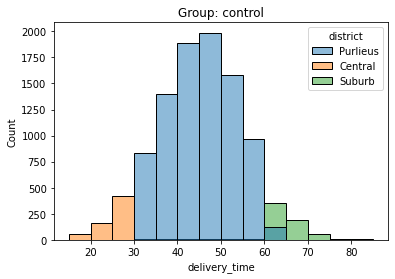

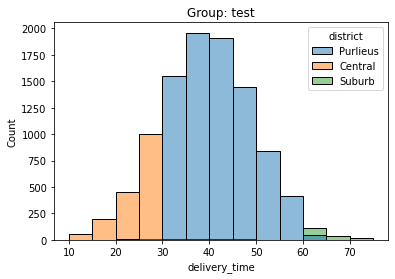

In [4]:
#строим гистограмму распределения времени по районам
plt.title('Group: control')
sns.histplot(x='delivery_time', data = df_control, hue='district', binwidth=5)
plt.show()

plt.title('Group: test')
sns.histplot(x='delivery_time', data = df_test, hue='district', binwidth=5)

In [5]:
#кол-во наблюдений в группах
print('кол-во наблюдений в control =', df_control.order_id.count())
print('кол-во наблюдений в test =', df_test.order_id.count())

кол-во наблюдений в control = 10092
кол-во наблюдений в test = 10104


In [16]:
#проверка на нормальность группы control

scipy.stats.normaltest(df_control.delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [15]:
#проверка на нормальность группы test

scipy.stats.normaltest(df_test.delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [13]:
print('std в control =', round(np.std(df_control.delivery_time),2))
print('std в test =', round(np.std(df_test.delivery_time),2))

std в control = 9.99
std в test = 9.88


In [32]:
control_mean = np.mean(df_control.delivery_time)
test_mean = np.mean(df_test.delivery_time)
print('mean в control =', control_mean)
print('mean в test =', test_mean)

mean в control = 45.065101070154576
mean в test = 39.04681314330958


In [18]:
#проводим t-тест на равенство средний в группах
scipy.stats.ttest_ind(df_test.delivery_time, df_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [33]:
#изменение среднегого времени в процентах
round((test_mean - control_mean) / control_mean * 100, 2)

-13.35

In [30]:
(test_mean-control_mean)/control_mean

-0.13357000221877086

In [31]:
test_mean/control_mean

0.8664299977812291

In [ ]:
np.mean(df_control.delivery_time